# <font style = 'background-color:magenta' color= 'black'>HEALTH INSURANCE PREMIUM PREDICTION</font>  

 ### <font color= 'purple'>Importing Libraries</font> 

In [1]:
#importing libraries
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### <font color= 'purple'>Importing the csv file</font> 

In [2]:
#importing the dataset
health_df = pd.read_csv("/Users/ameybasangoudar/Downloads/Medicalpremium.csv")

In [3]:
health_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
health_df.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


### <font color= 'purple'>About the Data</font> 

In [5]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [6]:
# Checking for null values 
health_df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
#Independent Variables
X = health_df.iloc[:,:len(health_df.columns)-1] 
print('\033[1m' + 'Independent Variables:' + '\033[0m')

for i in X.columns:
    print(i)
    
# Dependent variables
Y = health_df.iloc[:, len(health_df.columns)-1 :len(health_df.columns)]
print('\033[1m' + 'Dependent variable:' + '\033[0m')

for i in Y.columns:
    print(i)    

Independent Variables:
Age
Diabetes
BloodPressureProblems
AnyTransplants
AnyChronicDiseases
Height
Weight
KnownAllergies
HistoryOfCancerInFamily
NumberOfMajorSurgeries
Dependent variable:
PremiumPrice


In [8]:
# Categorical and Numeric variables
numeric = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']
categorical = [i for i in health_df.columns if i not in numeric]
print('\033[1m' + 'Categorical variables:' + '\033[0m')
for i in categorical:
    print(i)
print('\n\033[1m' + 'Numeric variables:' + '\033[0m')
for j in numeric:
    print(j)

Categorical variables:
Diabetes
BloodPressureProblems
AnyTransplants
AnyChronicDiseases
KnownAllergies
HistoryOfCancerInFamily

Numeric variables:
Age
Height
Weight
NumberOfMajorSurgeries
PremiumPrice


In [9]:
health_df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


### <font color= 'purple'>Correlation between the variables</font> 

In [10]:
# Correlation between the variables
health_corr = health_df.corr()

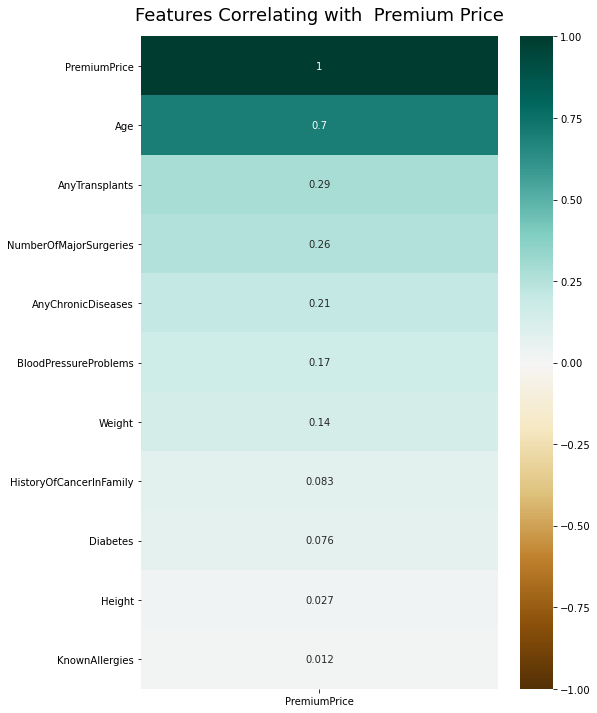

In [11]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(health_df.corr()[['PremiumPrice']].sort_values(by='PremiumPrice', 
                                                                     ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with  Premium Price', fontdict={'fontsize':18}, pad=16);

<ipython-input-12-0df8674e2538>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(health_corr, mask=np.zeros_like(health_corr, dtype=np.bool),


Text(0.5, 1.0, 'Correlation Heat Map')

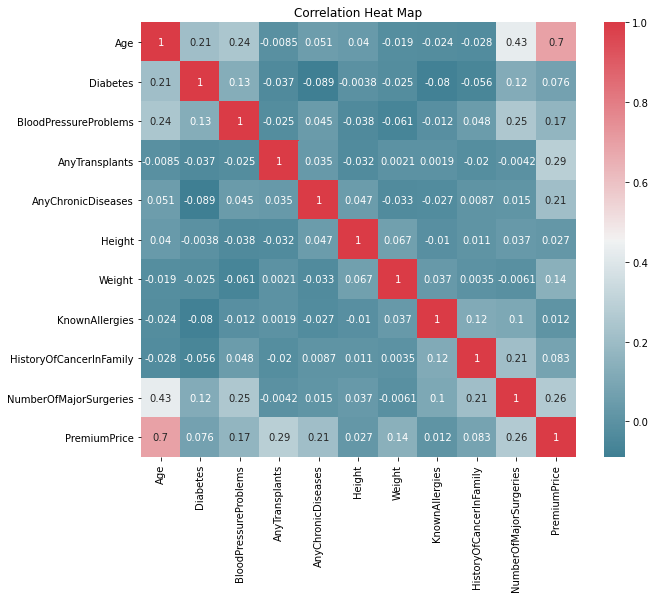

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(health_corr, mask=np.zeros_like(health_corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, ax = ax)
plt.title('Correlation Heat Map')

### <font color= 'purple'>Univariate Analysis</font> 

/Users/ameybasangoudar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ameybasangoudar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

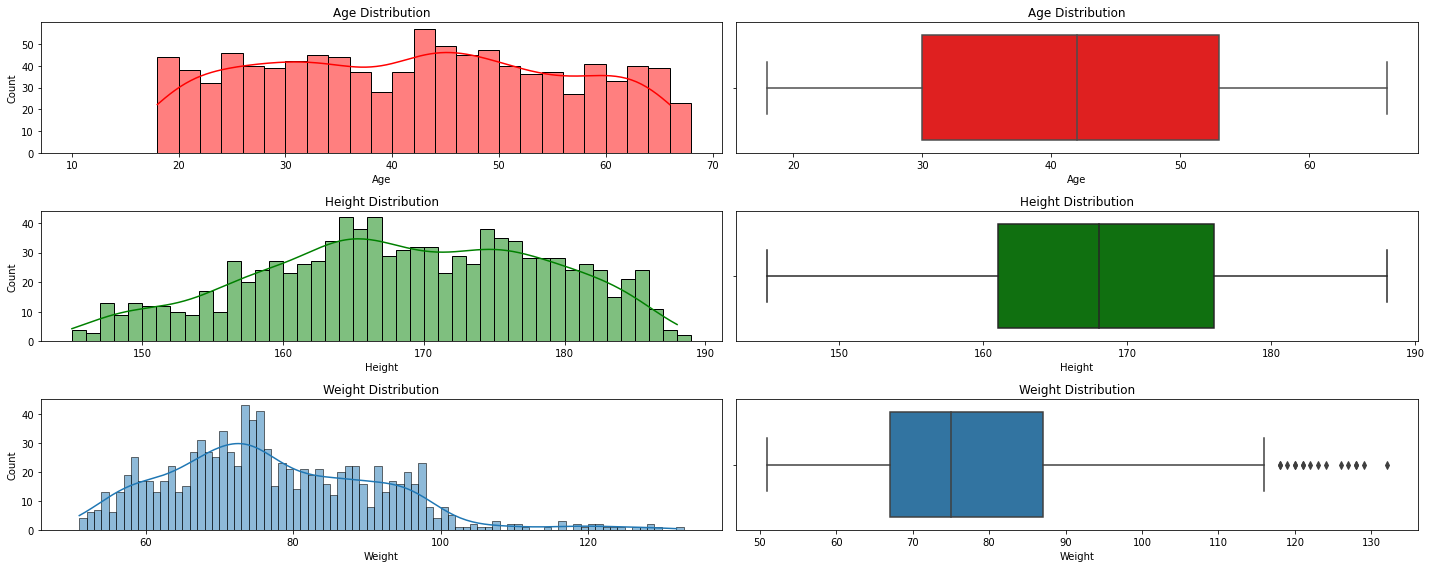

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [13]:
fig, axes = plt.subplots(3,2, figsize=(20,8))

bins = [i for i in range(10, 70, 2)]
plt.figure(figsize = (10, 6))
sns.histplot(health_df['Age'], bins = bins, edgecolor = 'black', color = 'red', kde = True, 
             ax = axes[0, 0]).set_title('Age Distribution')
plt.figure(figsize = (10, 6))
sns.boxplot(health_df['Age'], color = 'red', ax = axes[0, 1]).set_title('Age Distribution')
# plt.axvline(x=health_df['Age'].mean(), linewidth=3, color='g', label="mean", alpha=0.5, ax = axes[0, 0])
# plt.axvline(x=health_df['Age'].median(), linewidth=3, color='y', label="median", alpha=0.5, ax = axes[0, 0])
# mean=health_df['Age'].mean()
# median=health_df['Age'].median()
# ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
# ax_hist.axvline(median, color='g', linestyle='-', label="Median")
 
bins = [i for i in range(145, 190, 1)]
plt.figure(figsize = (10, 6))
sns.histplot(health_df['Height'], bins = bins, edgecolor = 'black', kde = True, color = 'green', 
             ax = axes[1, 0]).set_title('Height Distribution')
plt.figure(figsize = (10, 6))
sns.boxplot(health_df['Height'], color = 'green', 
             ax = axes[1, 1]).set_title('Height Distribution')

bins = [i for i in range(50, 135, 1)]
plt.figure(figsize = (10, 6))
sns.histplot(health_df['Weight'], bins = bins, edgecolor = 'black', kde = True, 
             ax = axes[2, 0]).set_title('Weight Distribution')
plt.figure(figsize = (10, 6))
sns.boxplot(health_df['Weight'], 
             ax = axes[2, 1]).set_title('Weight Distribution')


fig.tight_layout()


/Users/ameybasangoudar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


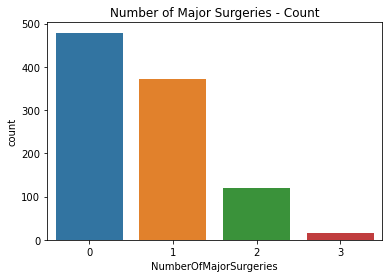

In [14]:
sns.countplot(health_df['NumberOfMajorSurgeries']).set_title('Number of Major Surgeries - Count')
plt.show()

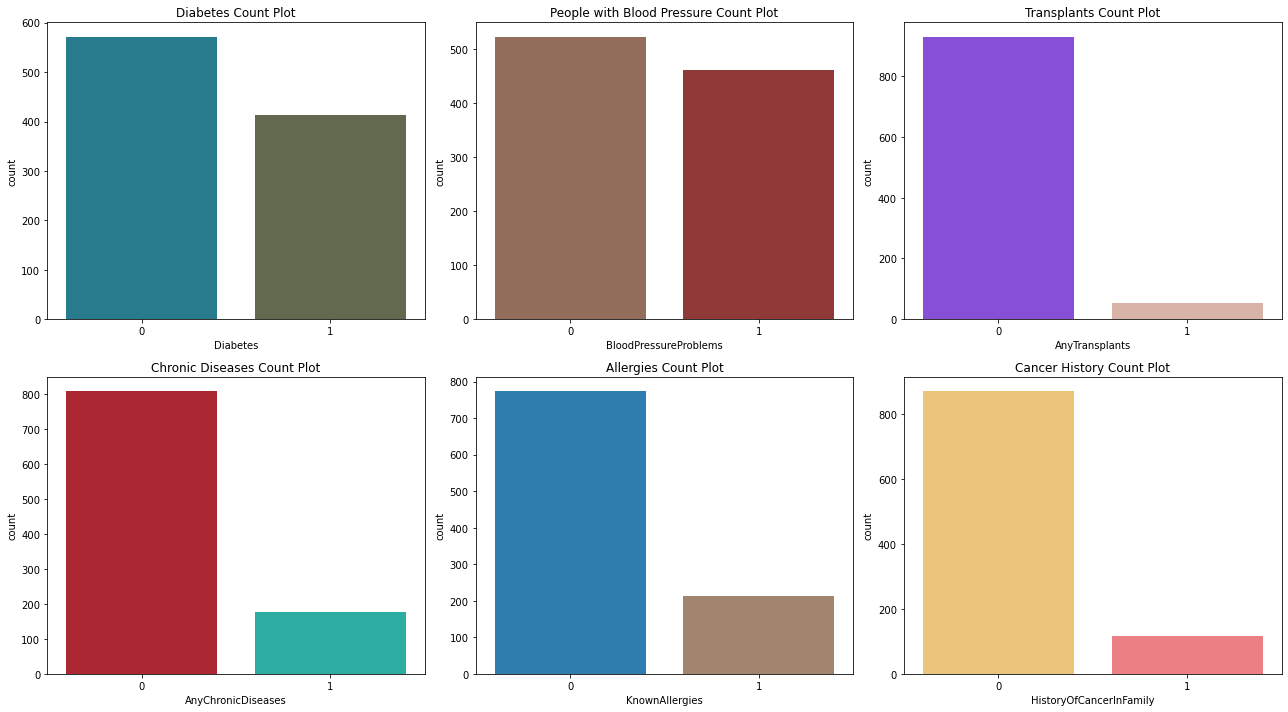

In [15]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='Diabetes', data=health_df, 
              ax=axes[0,0], palette=['#17869E',"#656d4a"]).set_title('Diabetes Count Plot')
sns.countplot(x='BloodPressureProblems', data=health_df, 
              ax=axes[0,1], palette=['#9d6b53',"#9e2a2b"]).set_title('People with Blood Pressure Count Plot')
sns.countplot(x='AnyTransplants', data=health_df, 
              ax=axes[0,2], palette=['#8338ec',"#e0afa0"]).set_title('Transplants Count Plot')
sns.countplot(x='AnyChronicDiseases', data=health_df, 
              ax=axes[1,0], palette=['#c1121f',"#17c3b2"]).set_title('Chronic Diseases Count Plot')
sns.countplot(x='KnownAllergies', data=health_df, 
              ax=axes[1,1], palette=['#1982c4',"#a98467"]).set_title('Allergies Count Plot')
sns.countplot(x='HistoryOfCancerInFamily', data=health_df, 
              ax=axes[1,2], palette=['#ffcb69',"#fe6d73"]).set_title('Cancer History Count Plot')

fig.tight_layout()


 ### <font color= 'purple'>Bivariate Analysis</font> 

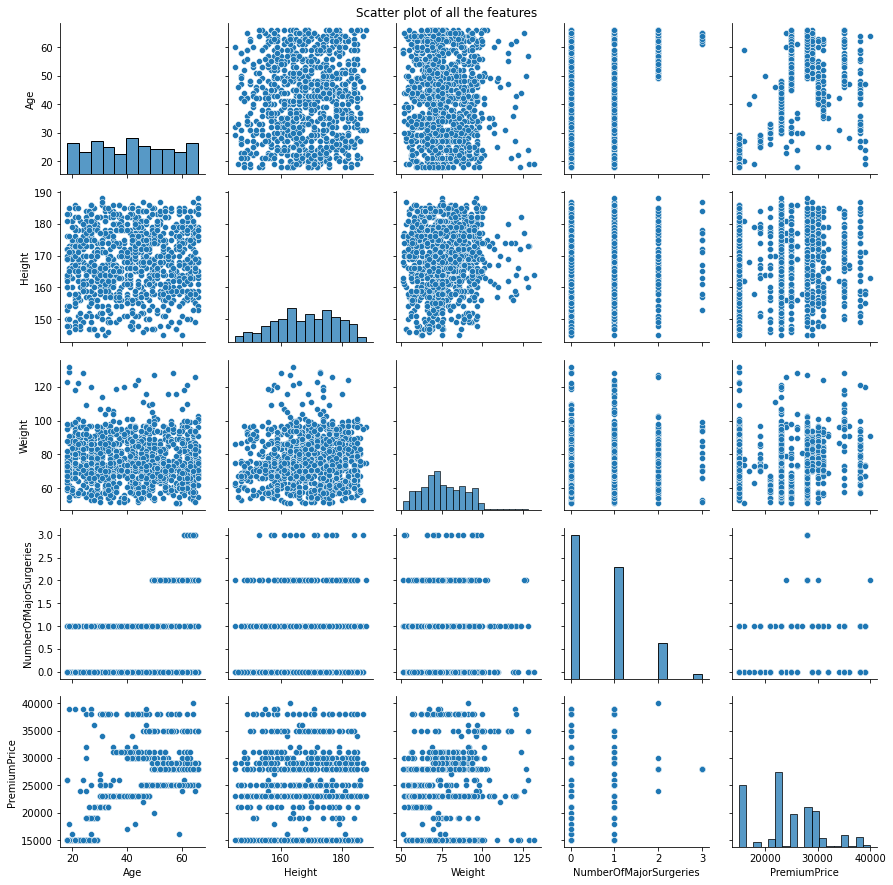

In [16]:
# Pairplots of all the numeric variables
sns.pairplot(health_df[numeric]).fig.suptitle('Scatter plot of all the features')
plt.tight_layout()

### <font color= 'purple'>Feature Engineering</font> 

Lets find the BMI for each observation

In [17]:
health_df['BMI'] = health_df['Weight'] / ((health_df['Height'] / 100) ** 2)

In [18]:
health_df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


/Users/ameybasangoudar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


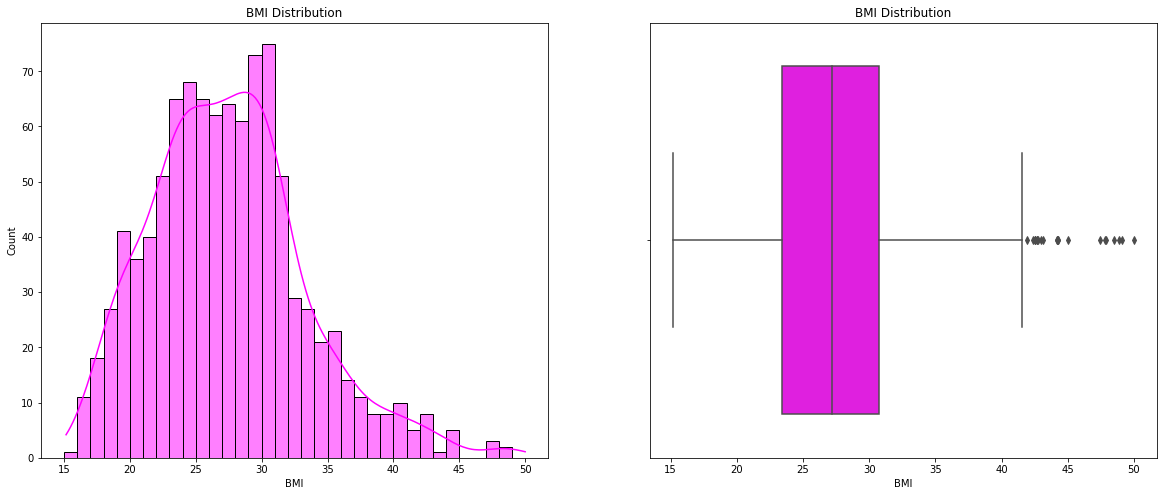

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

# BMI distribution
bins = [i for i in range(15, 50, 1)]
sns.histplot(health_df['BMI'], bins = bins, edgecolor = 'black', color = 'magenta', kde = True, ax = ax1).set_title('BMI Distribution')

# BMI boxplot
sns.boxplot(health_df['BMI'], ax = ax2, color = 'magenta').set_title('BMI Distribution')
plt.show()

##### Normal BMI range of a person to be healthy -> 18.5 to 24.9 kg/m*m

In [20]:
health_df[['BMI']].describe()

,BMI
count,986.000000
mean,27.460709
std,5.878671
min,15.156281
25%,23.393392
50%,27.156602
75%,30.759870
max,50.000000


##### We can see from the distribution that more 50% of the people in the dataset are overweight

Text(0.5, 1.0, 'Insurance Premium Price Vs BMI')

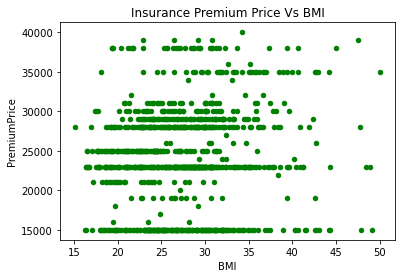

In [21]:
# BMI Vs Premium Price
health_df.plot.scatter(x = 'BMI', y = 'PremiumPrice', color = 'green')
plt.title('Insurance Premium Price Vs BMI')

In [22]:
# Lets group the BMI's based on four categories namely under-weight, normal, over-weight and obese
labels = ['Under-Weight','Normal','Over-Weight','Obese']
bins = [15, 19, 25, 30, 50]
health_df['Weight Category'] = pd.cut(health_df.BMI, bins = bins, labels = labels)

Text(0.5, 1.0, 'Count of each weight category')

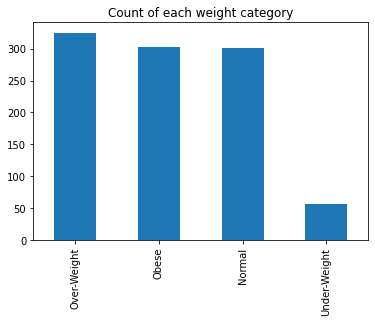

In [23]:
# Check the count of each Weight Category
health_df['Weight Category'].value_counts().plot.bar()
plt.title('Count of each weight category')

<AxesSubplot:title={'center':'Distribution of Age for each Weight Category'}, xlabel='Weight Category', ylabel='Age'>

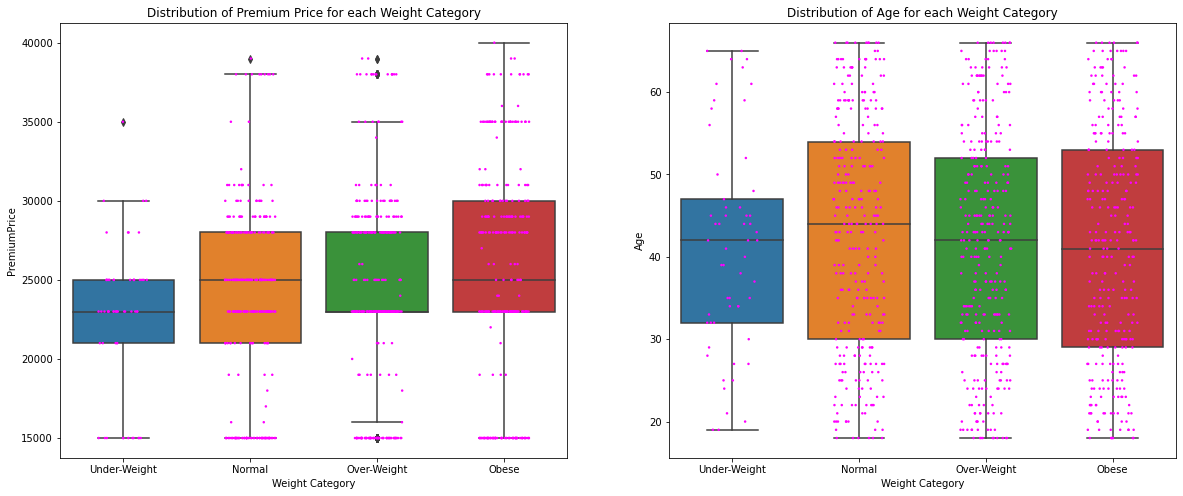

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

sns.boxplot(x='Weight Category',y='PremiumPrice',
            data = health_df, ax = ax1).set_title('Distribution of Premium Price for each Weight Category')
sns.stripplot(x='Weight Category',y='PremiumPrice',
              data = health_df, color="magenta", jitter=0.2, size=2.5, ax = ax1)

sns.boxplot(x='Weight Category',y='Age',data = health_df, 
            ax = ax2).set_title('Distribution of Age for each Weight Category')
sns.stripplot(x='Weight Category',y='Age',
              data = health_df, color="magenta", jitter=0.2, size=2.5, ax = ax2)

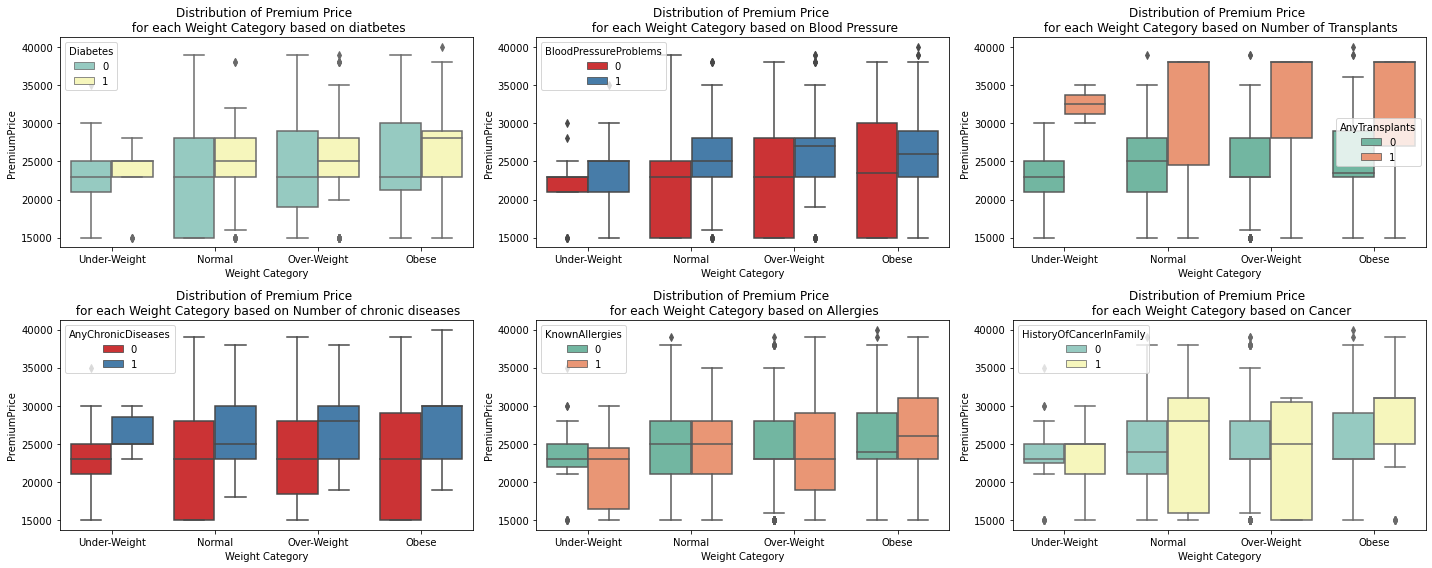

In [25]:
fig, axes = plt.subplots(2,3, figsize=(20,8))

sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'Diabetes',data = health_df, 
            ax = axes[0, 0], 
            palette = 'Set3').set_title('Distribution of Premium Price \n for each Weight Category based on diatbetes')
sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'BloodPressureProblems',data = health_df, 
            ax = axes[0, 1], 
            palette = 'Set1').set_title('Distribution of Premium Price \n for each Weight Category based on Blood Pressure')
sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'AnyTransplants',data = health_df, 
            ax = axes[0, 2], 
            palette = 'Set2').set_title('Distribution of Premium Price \n for each Weight Category based on Number of Transplants')
sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'AnyChronicDiseases',data = health_df, 
            ax = axes[1, 0], 
            palette = 'Set1').set_title('Distribution of Premium Price \n for each Weight Category based on Number of chronic diseases')
sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'KnownAllergies',data = health_df, 
            ax = axes[1, 1], 
            palette = 'Set2').set_title('Distribution of Premium Price \n for each Weight Category based on Allergies')
sns.boxplot(x='Weight Category',y='PremiumPrice', 
            hue = 'HistoryOfCancerInFamily',data = health_df, 
            ax = axes[1, 2], 
            palette = 'Set3').set_title('Distribution of Premium Price \n for each Weight Category based on Cancer')

fig.tight_layout()


In [26]:
health_df['Weight Category'].value_counts(normalize = True)

Over-Weight     0.329615
Obese           0.307302
Normal          0.305274
Under-Weight    0.057809
Name: Weight Category, dtype: float64

### <font color= 'purple'>Train Test Split</font> 

In [78]:
# Sampling the dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

### <font color= 'purple'>Feature Scaling using Standardization</font> 

In [79]:
random.seed(13)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [80]:
x_train

array([[ 0.02243568, -0.86442373, -0.93843927, ..., -0.52054562,
        -0.38124643, -0.90479569],
       [ 0.96052191, -0.86442373,  1.06559906, ..., -0.52054562,
        -0.38124643,  1.80615109],
       [-0.91565054, -0.86442373,  1.06559906, ..., -0.52054562,
         2.62297541,  0.4506777 ],
       ...,
       [ 0.96052191, -0.86442373,  1.06559906, ..., -0.52054562,
        -0.38124643,  0.4506777 ],
       [ 1.3213243 ,  1.15684006, -0.93843927, ..., -0.52054562,
        -0.38124643, -0.90479569],
       [-1.27645294,  1.15684006, -0.93843927, ..., -0.52054562,
        -0.38124643,  0.4506777 ]])

In [81]:
x_test

array([[ 0.09459616, -0.86442373, -0.93843927, ..., -0.52054562,
        -0.38124643,  0.4506777 ],
       [-0.98781102,  1.15684006, -0.93843927, ..., -0.52054562,
        -0.38124643,  0.4506777 ],
       [-0.0497248 ,  1.15684006,  1.06559906, ..., -0.52054562,
        -0.38124643, -0.90479569],
       ...,
       [ 1.75428718,  1.15684006,  1.06559906, ..., -0.52054562,
        -0.38124643,  1.80615109],
       [-1.4207739 , -0.86442373, -0.93843927, ...,  1.92106121,
        -0.38124643,  0.4506777 ],
       [ 1.39348478, -0.86442373,  1.06559906, ..., -0.52054562,
        -0.38124643,  0.4506777 ]])

## <font color= 'black'>Model Building</font> 

### <font color= 'purple'>1) Multivariate Linear Regression</font> 

In [82]:
random.seed(13)
def mod_lm(x_train,y_train,x_test,y_test):
    from sklearn import linear_model

    mod_lm = linear_model.LinearRegression()
    mod_lm.fit(x_train, y_train)

    y_pred = mod_lm.predict(x_test)


    return y_pred

In [83]:
y_pred_lm = mod_lm(x_train,y_train,x_test,y_test)

In [84]:
y_test

,PremiumPrice
399,23000
871,15000
55,23000
795,15000
618,31000
...,...
280,26000
602,29000
75,28000
30,15000


In [85]:
y_lm = pd.DataFrame(y_pred_lm)
y_lm

,0
0,21848.783682
1,17250.280585
2,22058.958338
3,15849.316779
4,25451.700800
...,...
193,15042.461048
194,25557.528235
195,30245.190065
196,18025.864330


Text(0.5, 1.0, 'Multivariate Linear Regression Results')

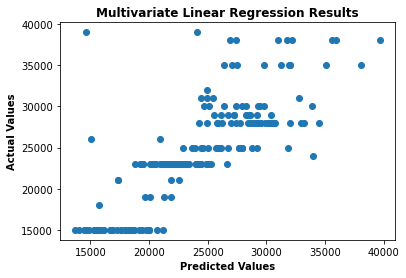

In [86]:
plt.scatter(y_lm[0], y_test['PremiumPrice'])
plt.xlabel('Predicted Values', fontweight = 'bold')
plt.ylabel('Actual Values', fontweight = 'bold')
plt.title('Multivariate Linear Regression Results', fontweight = 'bold')

In [87]:
#sns.scatterplot(x = y_test["PremiumPrice"], y = y_pred_lm).set_title('Predicted Values Vs Actual values')

In [88]:
r2_score(y_test, y_pred_lm)

0.6302483187108381

### <font color= 'purple'>2) Random Forest Regression</font> 

In [104]:
random.seed(13)
def mod_rf(x_train,y_train,x_test,y_test):
    regressor_rf = RandomForestRegressor()
    regressor_rf.fit(x_train, y_train)
    y_pred = regressor_rf.predict(x_test)
    return y_pred

In [105]:
y_pred = mod_rf(x_train,y_train,x_test,y_test)

<ipython-input-104-59ae0d82f2ed>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rf.fit(x_train, y_train)


In [106]:
y_rf = pd.DataFrame(y_pred)
y_rf

,0
0,23000.0
1,15420.0
2,22980.0
3,15110.0
4,30700.0
...,...
193,16820.0
194,29010.0
195,28270.0
196,15410.0


Text(0.5, 1.0, 'Random Forest Regression Results')

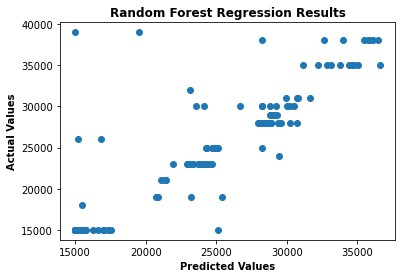

In [107]:
plt.scatter(y_rf[0], y_test['PremiumPrice'])
plt.xlabel('Predicted Values', fontweight = 'bold')
plt.ylabel('Actual Values', fontweight = 'bold')
plt.title('Random Forest Regression Results', fontweight = 'bold')

In [108]:
r2_score(y_test, y_pred)

0.7703560258497993